# Significance and Hypothesis Testing

We would like to run some hypothesis tests on our data.

In [118]:
#@title Imports
#@markdown Let's import our libraries we will use for this notebook.
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.8g}'.format

from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

import seaborn as sns

from IPython.display import display, HTML

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#@title Loading our data
#@markdown Make sure the file containing the data you wish to analyze is in your Google Drive
file_type = "xlsx" #@param ["csv", "xlsx"]
file_name = 'Lipid Data.xlsx' #@param ["estradiol.csv", "Hot Dogs.xlsx"] {type:"string", allow-input: true}

#@markdown Check the below box to inspect the imported data.
show_frame = True #@param {type:"boolean"}
#@markdown Show just first five? (Reduces screen clutter)
first_five = True #@param {type:"boolean"}

file_path = f"/content/drive/MyDrive/biostats-data/{file_name}"

match file_type:
  case "csv":
    data = pd.read_csv(file_path)
  case "xlsx":
    data = pd.read_excel(file_path)

#@markdown ---
if show_frame:
  if first_five:
    display(data.head())
  else:
    display(data)

,Name,Gender,Age,Weight,Cholesterol,Triglycerides,HDL,LDL,% ideal body wt.,Height,...,Trig-3yrs,Chol-3yrs,HDL-3yrs,LDL-3yrs,Exercise Freq. (min/wk),Coffee intake (cups/day),Smoking History,Alcohol use,Heart History,Cholesterol Loss
0,J. Suds,male,22,138,197,152,43,151.568,92.791824,67.125,...,135.0,182.0,34.0,145.840,180,1,no,2 - 6,none,15.0
1,T. Wilson,female,22,115,181,59,60,120.056,100.000000,63.000,...,57.0,151.0,48.0,102.088,0,2,no,< 2,none,30.0
2,D.S. Quintent,male,22,190,190,117,41,147.128,106.741573,72.000,...,86.0,169.0,37.0,130.624,90,0,no,< 2,none,21.0
3,R. Beal,female,22,115,131,54,58,72.136,79.310345,69.000,...,72.0,133.0,67.0,64.848,120,5,no,2 - 6,none,-2.0
4,R. James,male,25,160,172,93,49,121.512,86.956522,73.000,...,139.0,166.0,40.0,123.776,40,2,no,2 - 6,none,6.0


0    97.633136
1    106.17391
2    106.78652
3    72.372414
4    89.673913
        ...   
90         NaN
91         NaN
92         NaN
93         NaN
94         NaN
Name: % ideal weight-3yr, Length: 95, dtype: float64

## Generating Random Column

For the purposes of testing, we would like to generate a random column of integers between 1 and 2. These will form new classes for analysis.

We can do this like so:

In [7]:
data['Random'] = np.random.randint(1,3, size=(data.shape[0], 1))

,Name,Gender,Age,Weight,Cholesterol,Triglycerides,HDL,LDL,% ideal body wt.,Height,...,Chol-3yrs,HDL-3yrs,LDL-3yrs,Exercise Freq. (min/wk),Coffee intake (cups/day),Smoking History,Alcohol use,Heart History,Cholesterol Loss,Random
0,J. Suds,male,22,138,197,152,43,151.568,92.791824,67.125,...,182.0,34.0,145.840,180,1,no,2 - 6,none,15.0,2
1,T. Wilson,female,22,115,181,59,60,120.056,100.000000,63.000,...,151.0,48.0,102.088,0,2,no,< 2,none,30.0,2
2,D.S. Quintent,male,22,190,190,117,41,147.128,106.741573,72.000,...,169.0,37.0,130.624,90,0,no,< 2,none,21.0,1
3,R. Beal,female,22,115,131,54,58,72.136,79.310345,69.000,...,133.0,67.0,64.848,120,5,no,2 - 6,none,-2.0,2
4,R. James,male,25,160,172,93,49,121.512,86.956522,73.000,...,166.0,40.0,123.776,40,2,no,2 - 6,none,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,S. Shelley,male,22,151,215,107,40,173.288,87.790698,71.000,...,NaN,NaN,NaN,90,0,no,2 - 6,none,NaN,1
91,R. Tympani,male,30,147,142,50,61,80.200,91.875000,69.000,...,NaN,NaN,NaN,90,2,no,2 - 6,none,NaN,2
92,B. Howser,male,22,179,190,118,51,137.112,114.012739,68.500,...,NaN,NaN,NaN,135,0,no,2 - 6,none,NaN,1
93,H. Toledo,female,28,123,193,52,60,132.168,102.500000,64.000,...,NaN,NaN,NaN,225,2,no,2 - 6,over 60,NaN,2


Let's take a look at our new column.

In [10]:
display(data[['Name', 'Random']])

,Name,Random
0,J. Suds,2
1,T. Wilson,2
2,D.S. Quintent,1
3,R. Beal,2
4,R. James,1
...,...,...
90,S. Shelley,1
91,R. Tympani,2
92,B. Howser,1
93,H. Toledo,2


## Running T-tests

### Hypothesis 1: Men and woman have different mean weights.

Let's construct a function that will help us perform the t-test.

In [109]:
#@title T-Test Function
#@markdown Let's construct a function that will help us perform the t-test!

def ttest(df, colA, colB, groupA, groupB, confidence_level):

  group1 = df.loc[df[colA] == groupA, colB]
  group2 = df.loc[df[colA] == groupB, colB]

  # old method from TTest.ipynb
  # t_statistic, p_value, degrees_of_freedom = stats.ttest_ind(group1, group2, equal_var=False)
  test = stats.ttest_ind(group1, group2, equal_var=False, nan_policy='omit')
  t_statistic, p_value, degrees_of_freedom = test.statistic, test.pvalue, test.df
  ci = test.confidence_interval(confidence_level=0.95)
  ci_lower, ci_upper = ci.low, ci.high

  difference = np.mean(group1) - np.mean(group2)
  # std_error_diff = np.sqrt((np.var(group1) / (len(group1) - 1)) + (np.var(group2) / (len(group2) - 1)))
  std_error_diff = np.sqrt(stats.sem(group1, nan_policy='omit')**2 + stats.sem(group2, nan_policy='omit')**2)
  # degrees_of_freedom = len(group1) + len(group2) - 2
  crit_val = np.abs(stats.t.ppf(q=1-0.95, df=degrees_of_freedom-1))
  # ci_upper = difference + crit_val * std_error_diff
  # ci_lower = difference - crit_val * std_error_diff

  t_ratio = t_statistic
  two_tailed_p_value = p_value if p_value > 0.0001 else "<.0001*"
  right_tailed_p_value = p_value / 2 if p_value/2 > 0.0001 else "<.0001*"
  left_tailed_p_value = 1 - (p_value / 2) if (1 - p_value/2) > 0.0001 else "<.0001*"

  t_test_results = pd.DataFrame({
    'Difference': difference,
    'Std Err Dif': std_error_diff, #
    'Upper CL Dif': ci_upper, #
    'Lower CL Dif': ci_lower, #
    'Confidence': confidence_level,
    't Ratio': t_ratio,
    'DF': degrees_of_freedom,
    'Prob > |t|': two_tailed_p_value,
    'Prob > t': right_tailed_p_value,
    'Prob < t': left_tailed_p_value
  }, index=[0])

  display(HTML(f"<h3>T-Test Results</h3>"))
  # print(t_test_results.iloc[0,:])
  # print()

  # Create an array of x-values
  x = np.linspace(-4, 4, 500)

  # Calculate the probability density function (pdf) for the t-distribution
  pdf = stats.t.pdf(x, degrees_of_freedom)

  # Plotting the probability distribution
  plt.figure(figsize=(10, 6))

  # Plot the pdf
  plt.plot(x, pdf, label='PDF')

  # Fill the area where prob > |t|
  plt.fill_between(x, pdf, where=np.abs(x) > np.abs(t_ratio), color='blue', label='prob > |t|')
  plt.ylim(bottom=0)

  # Fill the area where prob < t
  # plt.fill_between(x, pdf, where=x < t_ratio, color='red', label='prob < t')

  plt.legend()
  plt.show()

  return t_test_results.T

As you can see above, you can use this function like so:

```
ttest(data, 'Class Column', 'Response', 'class1', 'class2', confidence_level)
```

So, for the first hypothesis, we are testing `'Gender'` as our class column, and `'Weight'` as our response column.

Let's look at our classes, too!

In [43]:
print(data['Gender'].unique())

['male' 'female']


As you can see, by using the `unique()` method of a column in a `DataFrame`, we can see the unique values that occur in this column. This will make sure we get the spelling right.

Now, let's run out test!


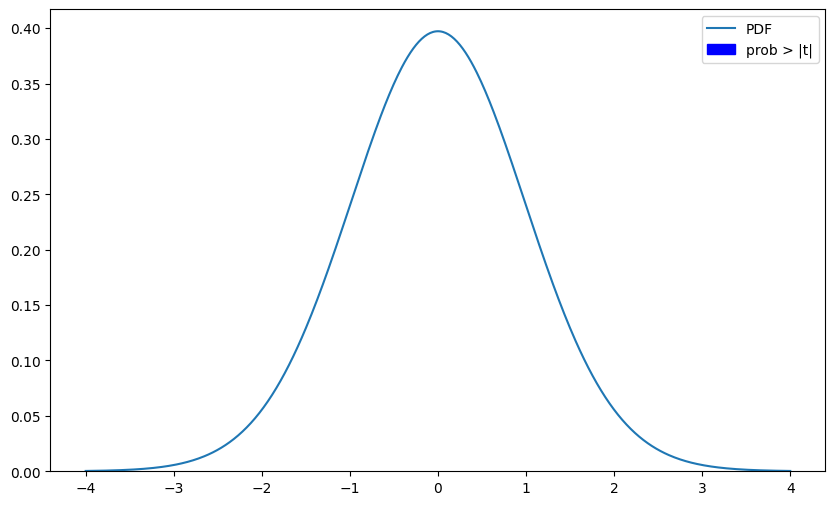

,0
Difference,42.073357
Std Err Dif,4.3109491
Upper CL Dif,50.705368
Lower CL Dif,33.441346
Confidence,0.95
t Ratio,9.7596506
DF,57.157627
Prob > |t|,<.0001*
Prob > t,<.0001*
Prob < t,1


In [111]:
ttest(data, 'Gender', 'Weight', 'male', 'female', 0.95)

Let's also create a swarm plot. This will give us a visualization of how the two distribtions compare.

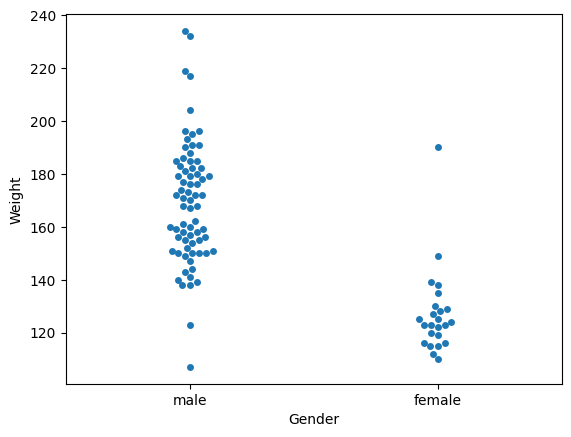

In [126]:
sns.swarmplot(x='Gender', y='Weight', data=data)
plt.show()

### Hypothesis 2: The people with Random = 1 and Random = 2 have different mean weights.

The beauty of Python is that, once we put all of our work into making a useful function, we can reuse it as many times as we want!

Let's run the t-test once again on Random = 1 and Random = 2 groups this time, as well as create the swarm plots.

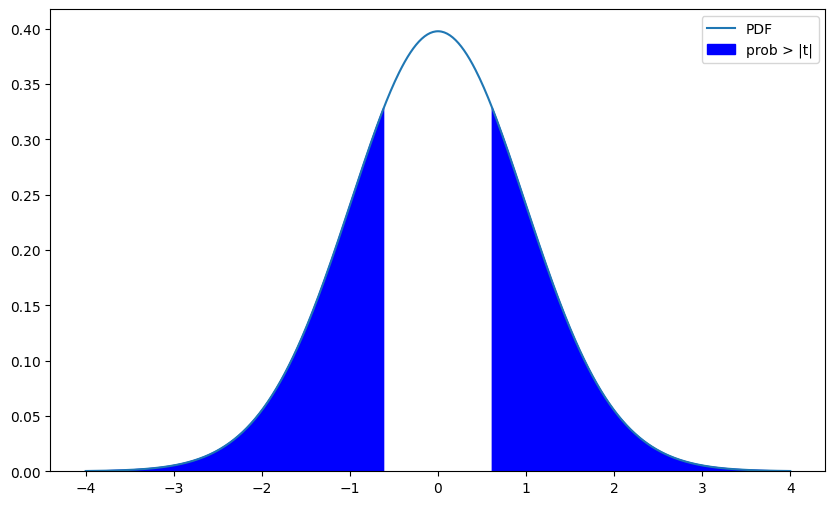

,0
Difference,-3.667754
Std Err Dif,5.9426052
Upper CL Dif,8.1607727
Lower CL Dif,-15.496281
Confidence,0.95
t Ratio,-0.61719631
DF,78.971236
Prob > |t|,0.53888077
Prob > t,0.26944038
Prob < t,0.73055962


In [117]:
ttest(data, 'Random', 'Weight', 2, 1, 0.95)

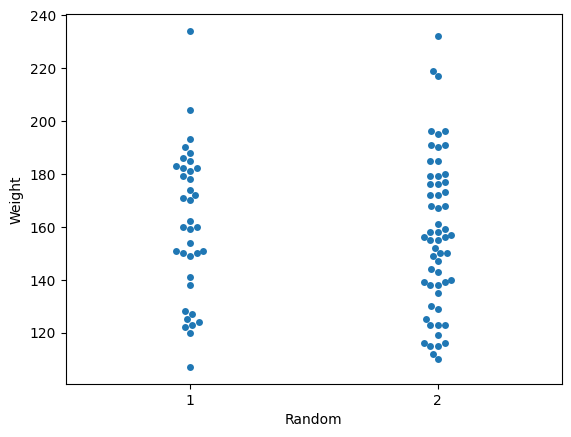

In [127]:
sns.swarmplot(x='Random', y='Weight', data=data)
plt.show()

### Hypothesis 3: Women’s mean weights are less than men’s.

Let's run the test on our third hypothesis and plot the distributions.

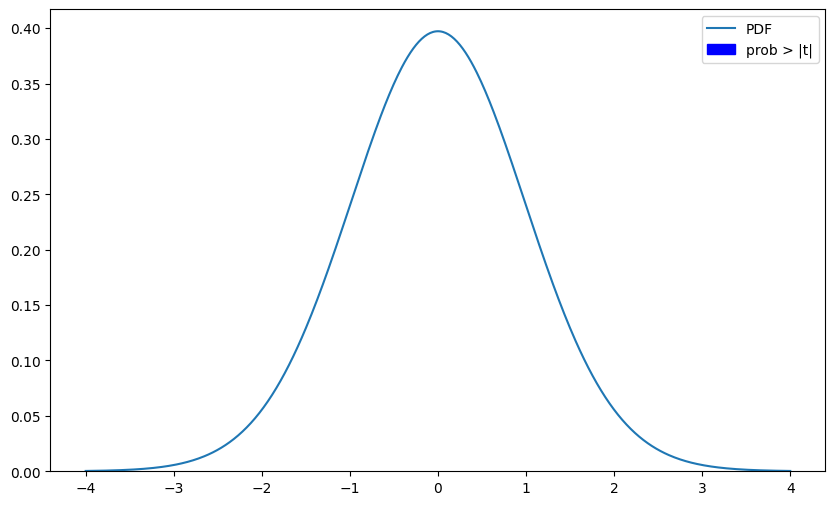

,0
Difference,42.073357
Std Err Dif,4.3109491
Upper CL Dif,50.705368
Lower CL Dif,33.441346
Confidence,0.95
t Ratio,9.7596506
DF,57.157627
Prob > |t|,<.0001*
Prob > t,<.0001*
Prob < t,1


In [113]:
ttest(data, 'Gender', 'Weight', 'male', 'female', 0.95)

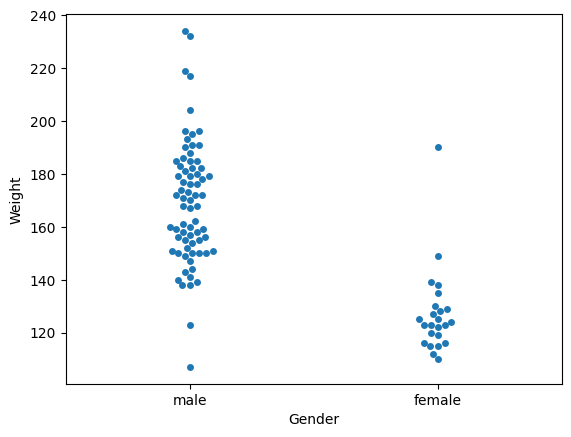

In [128]:
sns.swarmplot(x='Gender', y='Weight', data=data)
plt.show()

### Hypothesis 4: Men’s mean weights are less than women’s.


Let's run the test on our fourth hypothesis and plot the distributions.

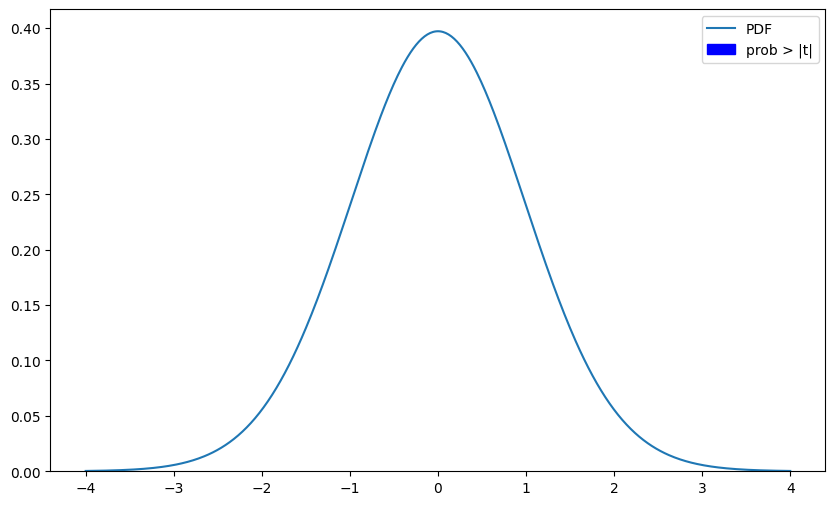

,0
Difference,42.073357
Std Err Dif,4.3109491
Upper CL Dif,50.705368
Lower CL Dif,33.441346
Confidence,0.95
t Ratio,9.7596506
DF,57.157627
Prob > |t|,<.0001*
Prob > t,<.0001*
Prob < t,1


In [114]:
ttest(data, 'Gender', 'Weight', 'male', 'female', 0.95)

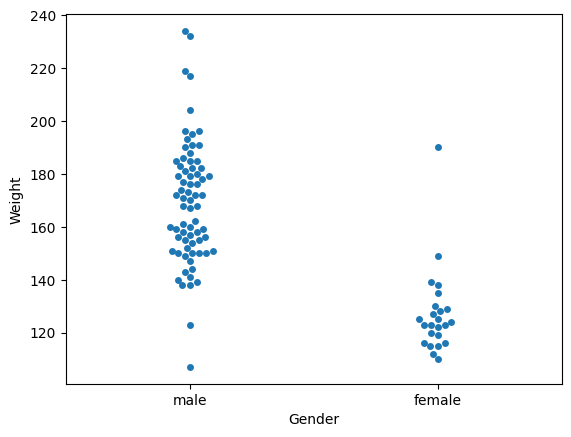

In [129]:
sns.swarmplot(x='Gender', y='Weight', data=data)
plt.show()

### Hypothesis 5: Men and woman have different mean cholesterol levels.

Let's run the test on our fifth hypothesis and plot the distributions.

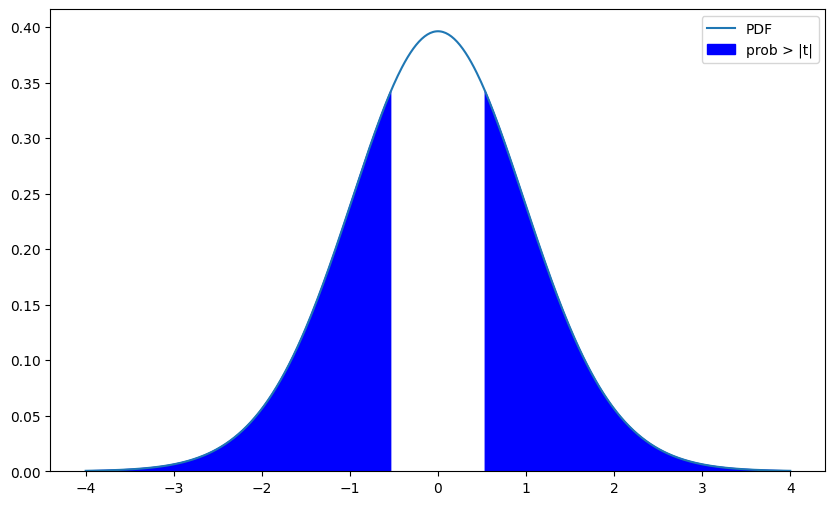

,0
Difference,-4.540493
Std Err Dif,8.6941803
Upper CL Dif,13.061873
Lower CL Dif,-22.142859
Confidence,0.95
t Ratio,-0.52224509
DF,37.874353
Prob > |t|,0.60454109
Prob > t,0.30227054
Prob < t,0.69772946


In [115]:
ttest(data, 'Gender', 'Cholesterol', 'male', 'female', 0.95)

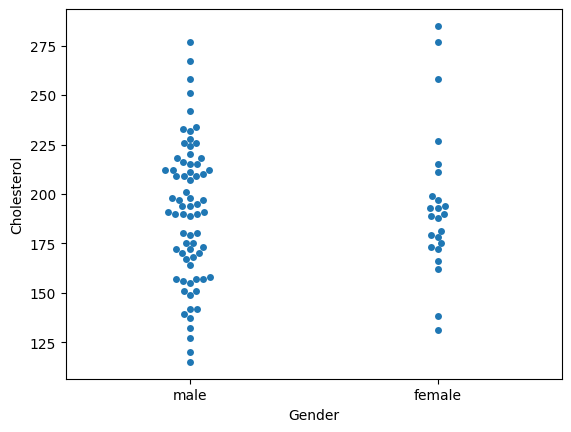

In [130]:
sns.swarmplot(x='Gender', y='Cholesterol', data=data)
plt.show()

### Hypothesis 6: Men and woman have different mean percentages of their ideal body weights.

Let's run the test on our sixth hypothesis and plot the distributions.

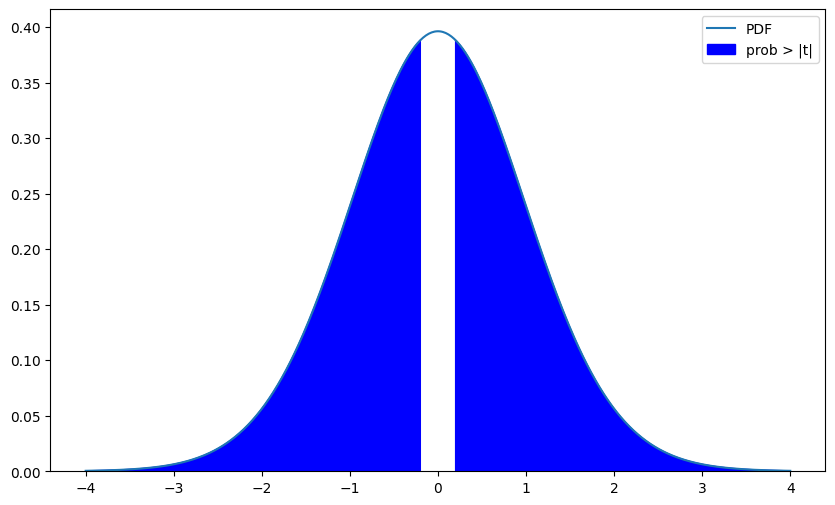

,0
Difference,0.62646099
Std Err Dif,3.3306886
Upper CL Dif,7.3722497
Lower CL Dif,-6.1193277
Confidence,0.95
t Ratio,0.18808753
DF,37.465221
Prob > |t|,0.8518231
Prob > t,0.42591155
Prob < t,0.57408845


In [134]:
ttest(data, 'Gender', '% ideal body wt.', 'male', 'female', 0.95)

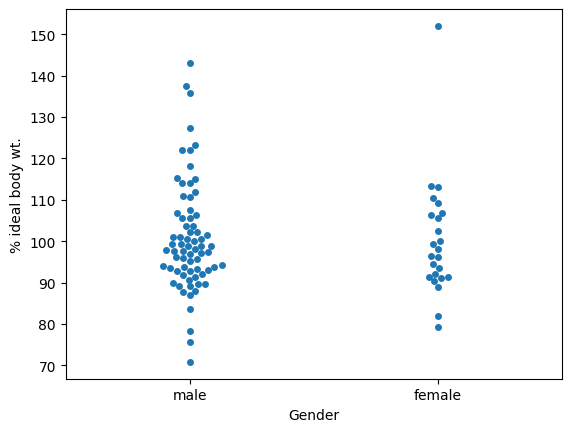

In [135]:
sns.swarmplot(x='Gender', y='% ideal body wt.', data=data)
plt.show()